## Plot Results

In [20]:
import pandas as pd
import seaborn as sns

In [76]:
dataset ='wikipedia'

In [77]:
errors = pd.read_csv(f'../results/expanding_window_results/errors/summary/{dataset}.csv', index_col=0)

base_errors = pd.read_csv(f'../results/expanding_window_results/errors/summary/{dataset}_base_errors.csv', index_col=0)

In [78]:
errors = errors.loc[errors['reconciliation method']!='erm']

In [79]:
global_models_deepAR = base_errors.loc[base_errors['base model'].isin(['deepAR', 'deepAR_cluster'])]
global_models_wavenet = base_errors.loc[base_errors['base model'].isin(['waveNet', 'waveNet_cluster'])]

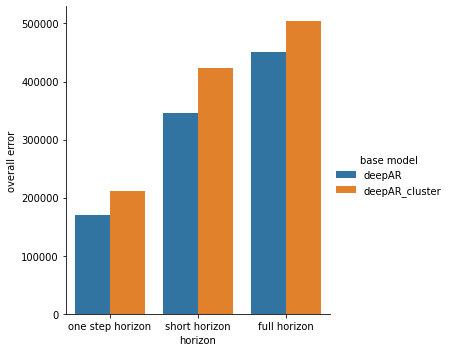

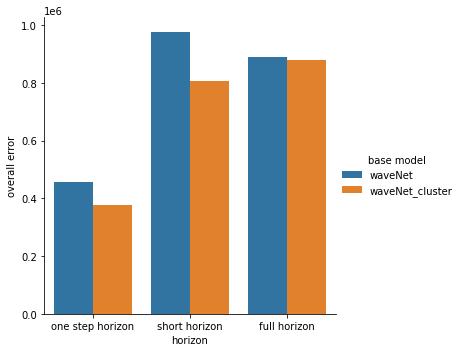

In [80]:
global_err_deepAR = sns.catplot(x="horizon",
                      y = 'overall error', data= global_models_deepAR, kind='bar',
                      hue ='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

global_err_wavenet = sns.catplot(x="horizon",
                      y = 'overall error', data= global_models_wavenet, kind='bar',
                      hue ='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

global_err_deepAR.figure.savefig(f'../results/expanding_window_results/{dataset}_deepAR.jpg')
global_err_wavenet.figure.savefig(f'../results/expanding_window_results/{dataset}_waveNet.jpg')

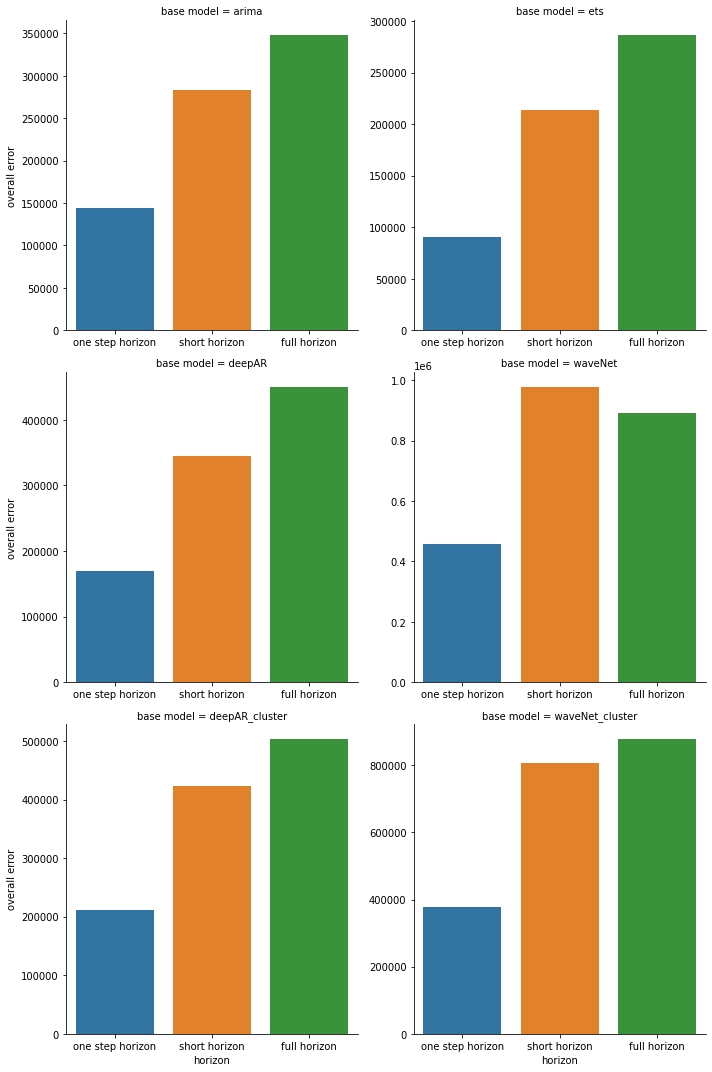

In [81]:
base_err = sns.catplot(x="horizon",
                      y = 'overall error', data= base_errors, kind='bar',
                      col_wrap=2,sharex = False, sharey= False,col='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

base_err.figure.savefig(f'../results/expanding_window_results/{dataset}_base_errors.jpg')

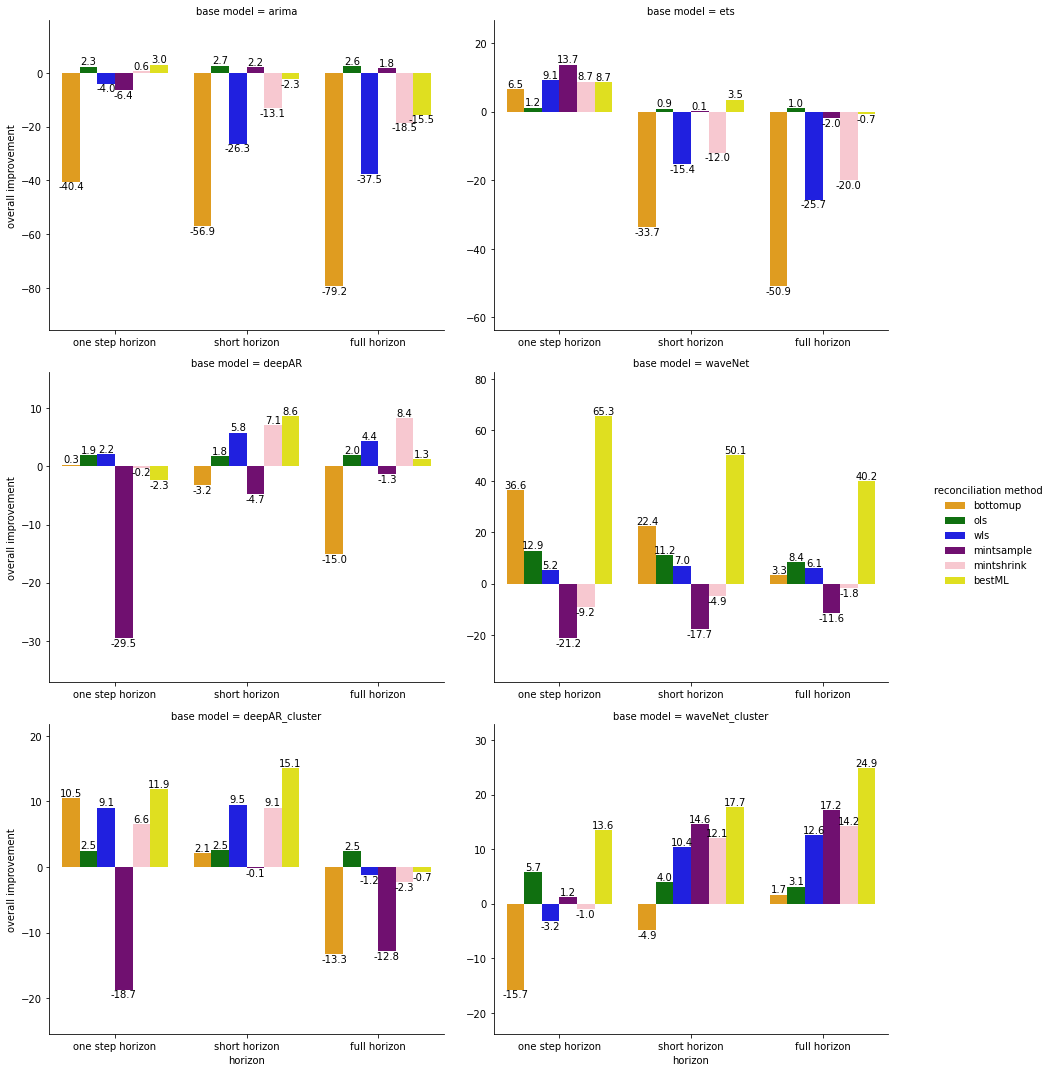

In [24]:
plot_err = sns.catplot(x="horizon", col="base model",
                y = 'overall improvement', hue ='reconciliation method', data= errors, kind='bar',  col_wrap=2,
                      sharex = False, sharey= False, order = ['one step horizon', 'short horizon', 'full horizon'], 
                      palette = ['orange', 'green', 'blue', 'purple', 'pink','yellow'])
plot_err.fig.set_size_inches(15, 15)
# iterate through axes
for ax in plot_err.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plot_err.figure.savefig(f'../results/expanding_window_results/{dataset}_errors.jpg')